In [6]:
# Step 1: Install required packages
!pip install pandas numpy matplotlib tensorflow

In [7]:
# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files

In [8]:
# Step 3: Upload your dataset
uploaded = files.upload()

Saving MSFT.csv to MSFT.csv


In [9]:
# Step 4: Load and preprocess data
# Replace 'your_stock_data.csv' with your actual filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Assuming your data has a 'Close' column
data = df.filter(['Close'])
dataset = data.values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create training data
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]

# Create the scaled training dataset
def create_dataset(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_dataset(train_data, time_steps)

# Reshape data for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Step 5: Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Step 6: Train the model
early_stop = EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    callbacks=[early_stop])


Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.0155e-04
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.2256e-05
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.3236e-05
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.1700e-05
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.3415e-05
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 9.7058e-06
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.9201e-06
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.4925e-06
Epoch 9/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.3060e-06
Epoch 10/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0478e-05
Epoch 11/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0533e-05
Epoch 12/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.1279e-05
Epoch 13/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0635e-05
Epoch 14/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - lo

In [12]:
# Step 7: Prepare test data
test_data = scaled_data[training_data_len - time_steps: , :]
X_test, y_test = create_dataset(test_data, time_steps)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
# Step 8: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Get actual values
actual = scaler.inverse_transform(test_data[time_steps:])

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


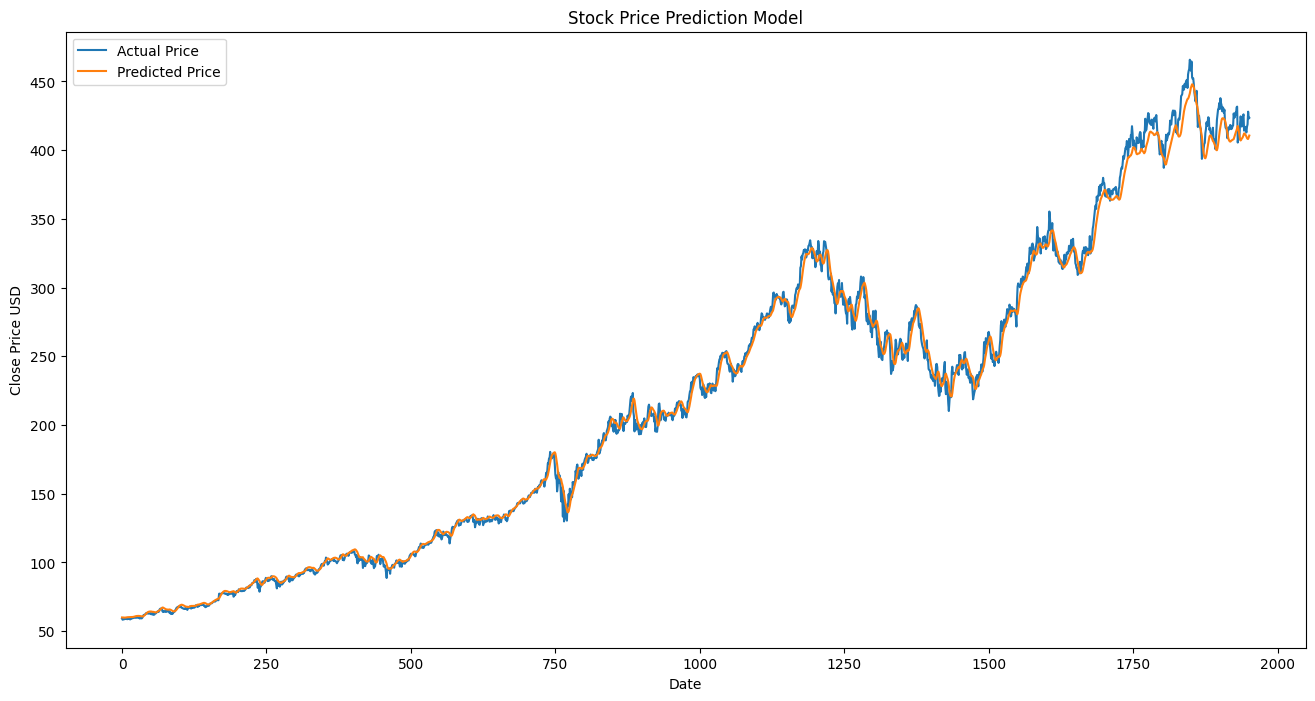

In [14]:
# Step 9: Plot results
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.show()

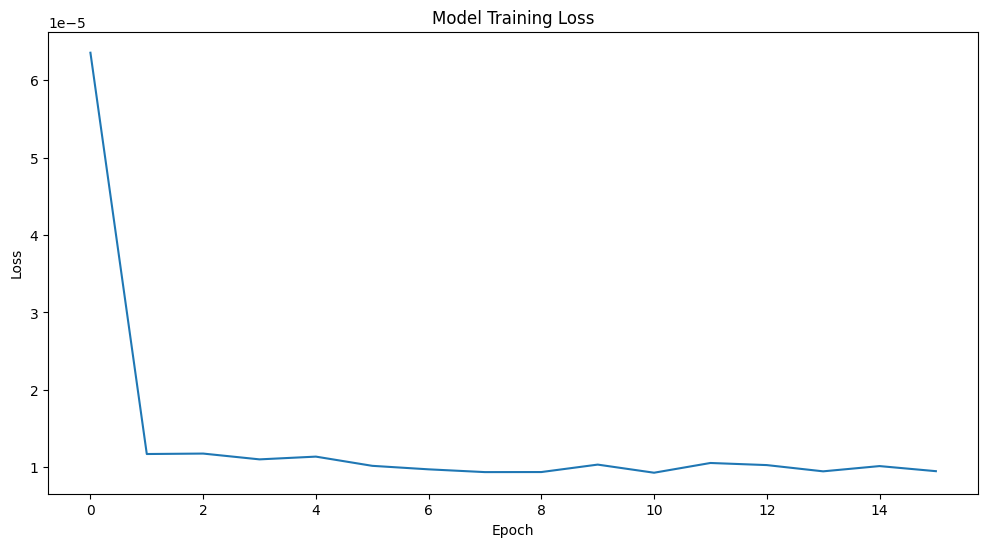

Root Mean Squared Error: 6.766581064679937


In [15]:


# Step 10: Plot training loss
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Optional: Calculate RMSE
rmse = np.sqrt(np.mean((predictions - actual)**2))
print(f'Root Mean Squared Error: {rmse}')